<a href="https://colab.research.google.com/github/Alok650/Sales-Analysis/blob/main/Sales_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Analysis Project
---

---

# **Sales Analysis**

> In this project we use Jupyter notebook to analyze and answer questions about 12 months worth of sales data of a firm. The data contains hundreds of thousands of electronics store purchases broken down by month, product type, cost, purchase address, etc.

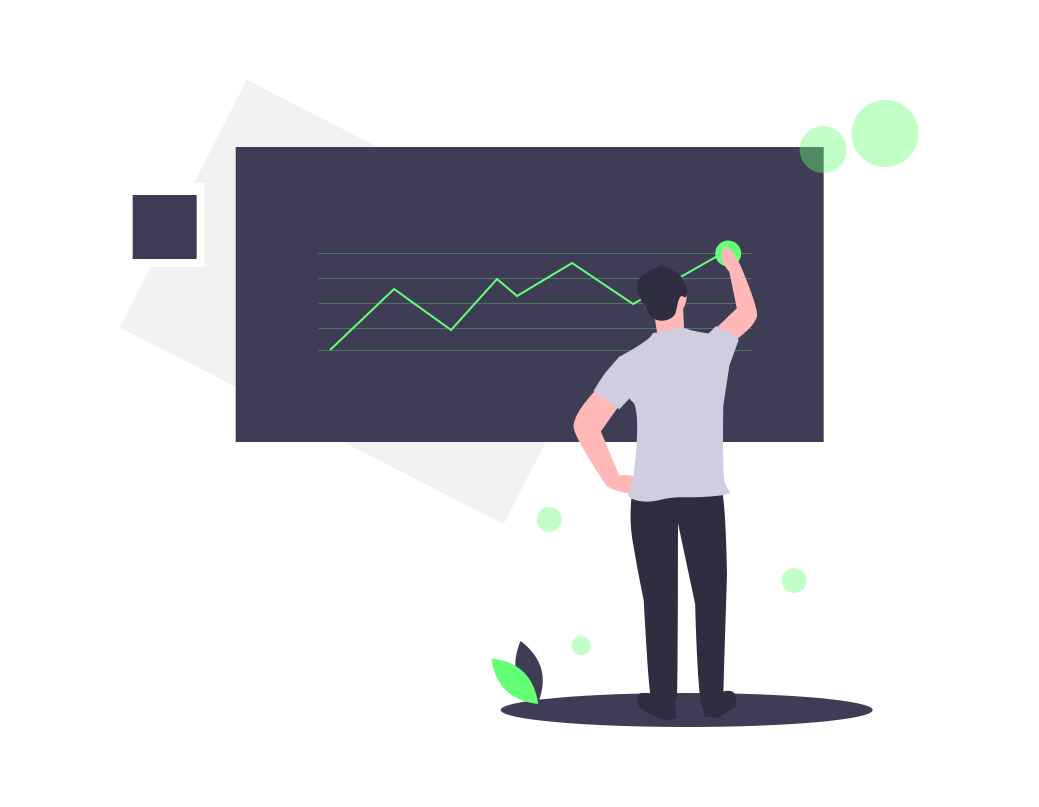


In [39]:
#Importing necessary libs
import pandas as pd

In [6]:
#Importing dataset for analysis
data = pd.read_csv('sales_data.csv')
data.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [12]:
#Shape of dataframe
data.shape


(186850, 6)

In [13]:
#Information about dataframe
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


In [14]:
#Description of data frame
data.describe()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
count,186305,186305,186305,186305,186305,186305
unique,178438,20,10,24,142396,140788
top,Order ID,USB-C Charging Cable,1,11.95,Order Date,Purchase Address
freq,355,21903,168552,21903,355,355


## **Data Cleaning**


In [15]:
#Importing necessary libs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
#Checking for any missing data
data.isna()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
186845,False,False,False,False,False,False
186846,False,False,False,False,False,False
186847,False,False,False,False,False,False
186848,False,False,False,False,False,False


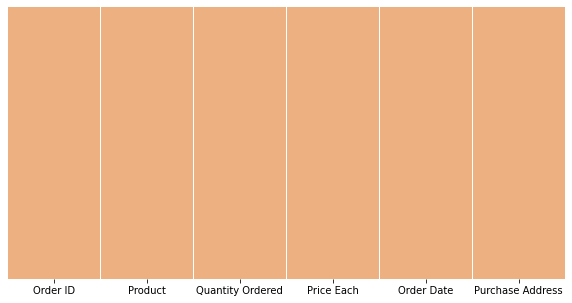

In [100]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(data.isnull(),cmap='flare',yticklabels=False,cbar=False)
plt.show()

In [17]:
#To get NaN rows
data[data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
664,NaN,NaN,NaN,NaN,NaN,NaN
678,NaN,NaN,NaN,NaN,NaN,NaN
797,NaN,NaN,NaN,NaN,NaN,NaN
876,NaN,NaN,NaN,NaN,NaN,NaN
1299,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
184390,NaN,NaN,NaN,NaN,NaN,NaN
184779,NaN,NaN,NaN,NaN,NaN,NaN
185239,NaN,NaN,NaN,NaN,NaN,NaN
185614,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#Droping all rows with NaN values
data = data.dropna(how = 'all')
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [19]:
#Finding and removing 'Or' in 'Order date' column
temp_data = data[data['Order Date'].str[0:2] == 'Or']
temp_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1073,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1102,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1194,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1897,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
2463,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
184502,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184542,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185088,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
185359,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [20]:
data = data[data['Order Date'].str[0:2]!='Or']
data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


## **Data Preprocessing**

Adding months column to analyse sales in each month


In [22]:
df = data.copy()
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"
...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016"
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001"
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016"
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101"


In [25]:
#Extracting the month of sale from 'Order date' column
df['Month'] = df['Order Date'].apply(lambda date : date.split("/")[0])
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",01
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",01
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",01
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",01
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",01
...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10


In [26]:
#To confirm that sales of all months are present
df['Month'].nunique()

12

In [28]:
# Check the format of the 'Month' column
type(df['Month'].iloc[0])

str

In [30]:
# Converting the 'Month' column from 'str' format to 'int' format.
df['Month'] = df['Month'].astype('int32')
type(df['Month'].iloc[0])


numpy.int32

 Add City column with their state name in the dataframe

In [32]:
# Checking a single address
df['Purchase Address'].iloc[0]

'944 Walnut St, Boston, MA 02215'

In [33]:
#Extracting city name and state name using split

city_name  = df['Purchase Address'].iloc[0].split(",")[1].strip(" ")
state_name = df['Purchase Address'].iloc[0].split(",")[2].split(" ")[1]
print(city_name)
print(state_name)

Boston
MA


In [38]:
# Functions which return city name and state name by taking address as an argument

#city_name
def get_city(address):
    return address.split(",")[1].strip(" ")
#state_name
def get_state(address):
    return address.split(",")[2].split(" ")[1]

# Add the 'City' column into the datafrmae ad fill the cities with their respective states
df['City'] = df['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)
...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA)
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA)
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA)
186848,278795,iPhone,1,700,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA)


# **Exploratory Data analysis(EDA)**
 We explore dataset to get answers to the following questions :
* What was the best month for sales and how much was earned in that month?
* What city had the highest number of sales?
* What time should the firm display advertisements to maximize likelihood of customer's buying product?
* What products are most often sold together?
* What product was sold the most and why?


In [40]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX)


In order to find sales => 
 **sales = Quantity * price of product**

In [41]:
type(df['Quantity Ordered'].iloc[0])


str

In [42]:
type(df['Price Each'].iloc[0])


str

In [43]:
#Converting 'Quantity ordered' and 'Price Each' in proper data formats
df['Quantity Ordered'] = pd.to_numeric(df['Quantity Ordered']) # int type
df['Price Each'] = pd.to_numeric(df['Price Each']) # float type

In [44]:
#Adding Sales column in data frame
df['Sales'] = df['Quantity Ordered'] * df['Price Each']
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99
...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,10/12/19 04:32,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA),3.84
186846,278793,Wired Headphones,1,11.99,10/28/19 22:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA),11.99
186847,278794,AA Batteries (4-pack),1,3.84,10/09/19 20:58,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA),3.84
186848,278795,iPhone,1,700.00,10/31/19 17:21,"291 Hill St, Seattle, WA 98101",10,Seattle (WA),700.00


In [45]:
# groupby Months and then sum to get monthly sales
Month_sales = df.groupby(['Month']).sum()
Month_sales

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1.811768e+06,1.822257e+06
2,13449,2.188885e+06,2.202022e+06
3,17005,2.791208e+06,2.807100e+06
4,20558,3.367671e+06,3.390670e+06
5,18667,3.135125e+06,3.152607e+06
6,15253,2.562026e+06,2.577802e+06
7,16072,2.632540e+06,2.647776e+06
8,13448,2.230345e+06,2.244468e+06
9,13109,2.084992e+06,2.097560e+06


In [46]:
#Month with max sales
Month_sales['Sales'].max()


4613443.34000153

range(1, 13)


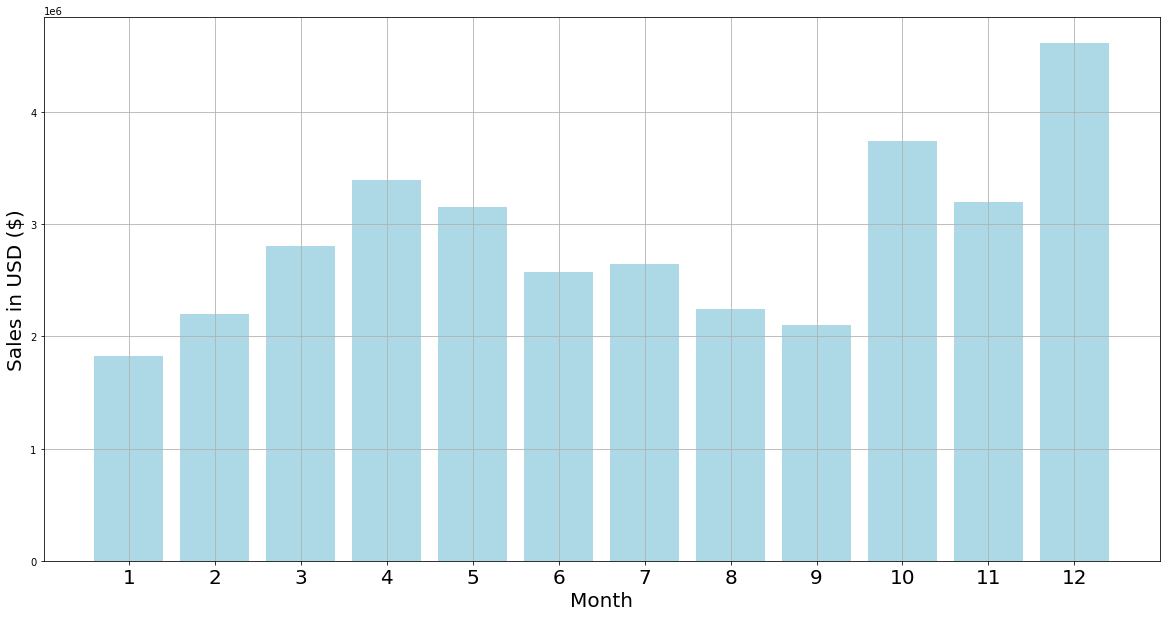

In [97]:
# Visualizing sales by months using matplotlib

months = range(1,13)
print(months)

plt.figure(figsize=(20,10))
plt.bar(months, Month_sales['Sales'],color='lightblue')
plt.xticks(months, size=20)
plt.ylabel('Sales in USD ($)', size=20)
plt.xlabel('Month', size=20)
plt.grid()
plt.show()

**Question 1.What was the best month for sales and how much was earned in that month?**
> **December** is the best month for sale and **$4613443.34000153** was earned in this month.



In [57]:
# groupby City and then sum to get sale in each city
City_sales = df.groupby(['City']).sum()
City_sales

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2.779908e+06,104794,2.795499e+06
Austin (TX),11153,1.809874e+06,69829,1.819582e+06
Boston (MA),22528,3.637410e+06,141112,3.661642e+06
Dallas (TX),16730,2.752628e+06,104620,2.767975e+06
Los Angeles (CA),33289,5.421435e+06,208325,5.452571e+06
New York City (NY),27932,4.635371e+06,175741,4.664317e+06
Portland (ME),2750,4.471892e+05,17144,4.497583e+05
Portland (OR),11303,1.860558e+06,70621,1.870732e+06
San Francisco (CA),50239,8.211462e+06,315520,8.262204e+06


In [58]:

# Store all cities in an array (to be used in bar plot)
cities = [city for city, df in City_sales.groupby(['City'])]

In [59]:
# Maximum sale in a city
City_sales['Sales'].max()

8262203.910004006

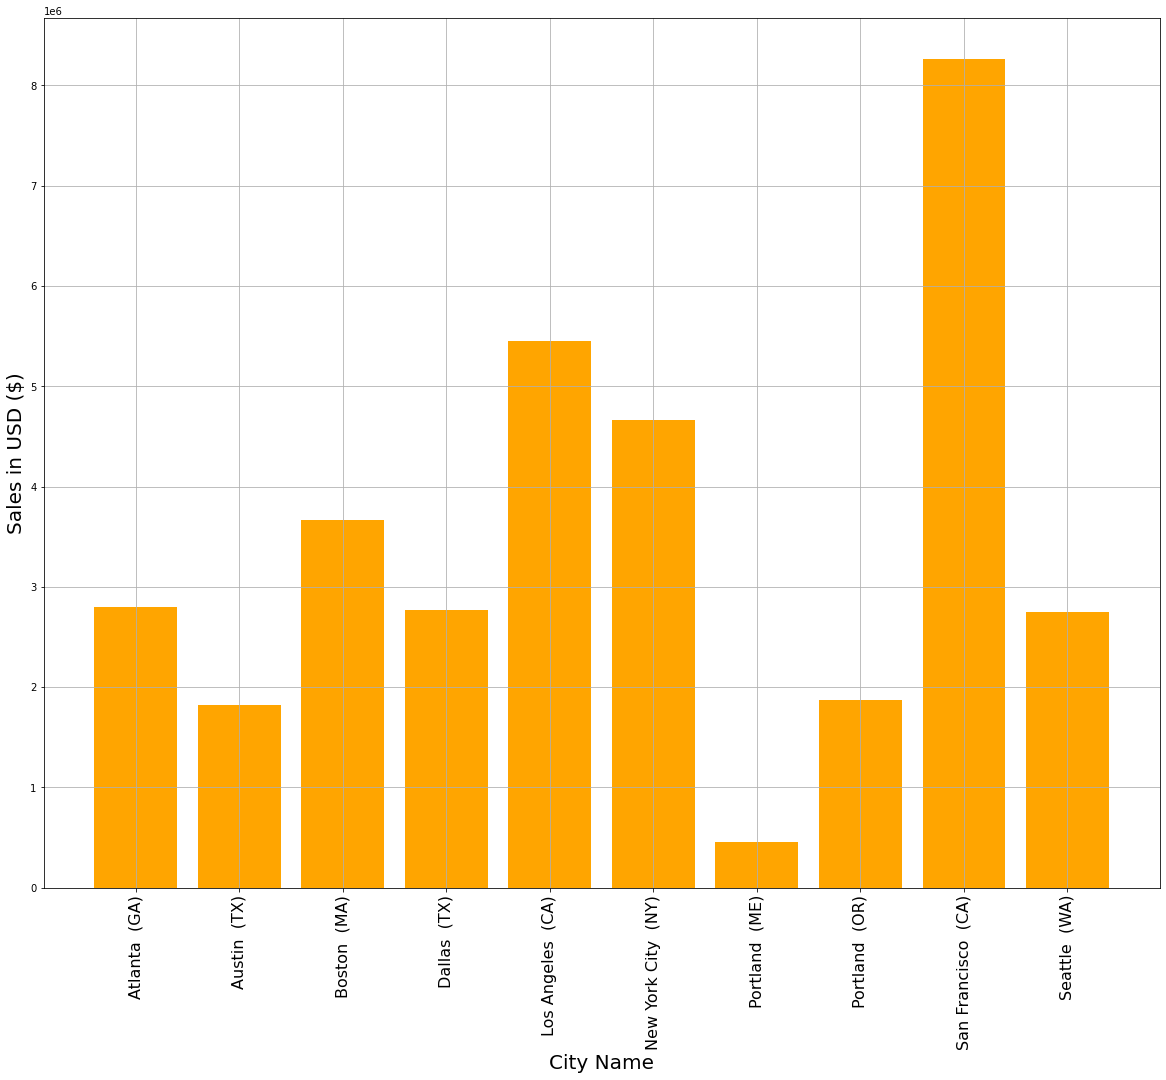

In [95]:

# Visualizing sales by city using matplotlib

plt.figure(figsize=(20,16))
plt.bar(cities, City_sales['Sales'], color = 'orange')
plt.xticks(cities, rotation='vertical', size=16)
plt.ylabel('Sales in USD ($)', size=20)
plt.xlabel('City Name', size=20)
plt.grid()
plt.show()

**Question 2. What city had the highest number of sales?**
> **San Francisco** had the highest sale in USA, i.e., **$8262203.910004006**.

In [63]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99


In [64]:
# Check the type of 'Order Date'
type(df['Order Date'].iloc[0])

str

In [66]:
# Convert the 'Order Date' from string to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
# Check the type of 'Order Date' again
type(df['Order Date'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [67]:
# Adding 'Hour' and 'Minutes' columns into the dataframe
df['Hour'] = df['Order Date'].apply(lambda time : time.hour)
df['Minute'] = df['Order Date'].apply(lambda time : time.minute)

In [68]:
# Checking the data type of 'Hour'
type(df['Hour'].iloc[0])

numpy.int64

In [69]:
# Add a Count column in the dataframe
df['Count'] = 1
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00,21,25,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95,14,15,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98,13,33,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99,20,33,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99,11,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,278792,AA Batteries (4-pack),1,3.84,2019-10-12 04:32:00,"920 Adams St, San Francisco, CA 94016",10,San Francisco (CA),3.84,4,32,1
186846,278793,Wired Headphones,1,11.99,2019-10-28 22:00:00,"161 Chestnut St, Los Angeles, CA 90001",10,Los Angeles (CA),11.99,22,0,1
186847,278794,AA Batteries (4-pack),1,3.84,2019-10-09 20:58:00,"346 Spruce St, San Francisco, CA 94016",10,San Francisco (CA),3.84,20,58,1
186848,278795,iPhone,1,700.00,2019-10-31 17:21:00,"291 Hill St, Seattle, WA 98101",10,Seattle (WA),700.00,17,21,1


In [70]:
# groupby Houre and then sum to get sale in each hour
Hour_sales = df.groupby(['Hour']).count()
Hour_sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Minute,Count
Hour,,,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256,6256


In [71]:
# Store all hours in an array(to be used in plot)
hours = [hour for hour, df in Hour_sales.groupby(['Hour'])]


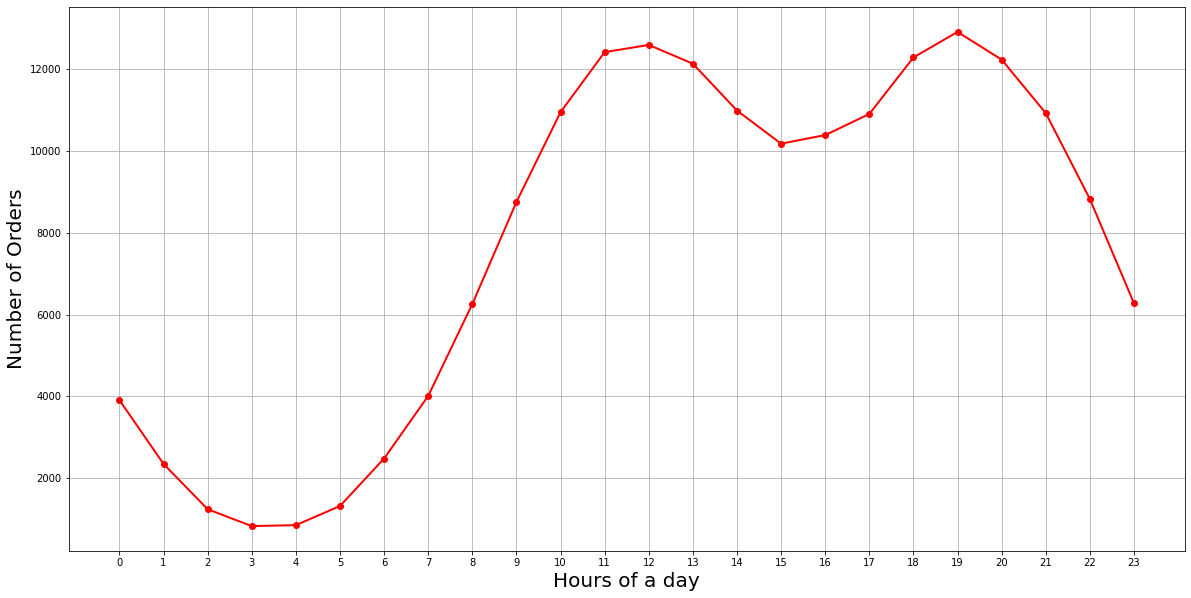

In [75]:
# Visualizing sales by hours using matplotlib

plt.figure(figsize=(20,10))
plt.plot(hours, Hour_sales['Count'], lw=2, marker='o', color='r')
plt.xticks(hours)
plt.ylabel('Number of Orders',size=20)
plt.xlabel('Hours of a day',size=20)
plt.grid()
plt.show()


**Question 3. What time should we display advertisements to maximize likelihood of customer's buying product?**
> **11 AM to 12 PM** or **7 PM** is the best time for displaying advertisements to maximize likelihood of customer's buying product.

In order to find which products were brought together, we must count duplicate Order IDs as if two products have same Order Id, it means they have been ordered together.

In [76]:
# Counting products with same Order Ids
dframe = df[df['Order ID'].duplicated(keep=False)]
dframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin (TX),11.95,16,6,1
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin (TX),11.99,16,6,1
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles (CA),150.00,8,25,1
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles (CA),11.52,8,25,1
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City (NY),400.00,11,19,1
...,...,...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,2019-10-07 18:18:00,"942 11th St, San Francisco, CA 94016",10,San Francisco (CA),11.95,18,18,1
186760,278710,USB-C Charging Cable,1,11.95,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,San Francisco (CA),11.95,19,5,1
186761,278710,27in FHD Monitor,1,149.99,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,San Francisco (CA),149.99,19,5,1
186769,278718,USB-C Charging Cable,1,11.95,2019-10-13 12:45:00,"479 Lincoln St, Atlanta, GA 30301",10,Atlanta (GA),11.95,12,45,1


In [77]:
# groupby 'Order ID' and made new column 'Grouped' in which we add products (separated by comma) with same Order ID.
dframe['Grouped'] = dframe.groupby('Order ID')['Product'].transform(lambda x : ','.join(x))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [78]:
dframe

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count,Grouped
41,141275,USB-C Charging Cable,1,11.95,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin (TX),11.95,16,6,1,"USB-C Charging Cable,Wired Headphones"
42,141275,Wired Headphones,1,11.99,2019-01-07 16:06:00,"610 Walnut St, Austin, TX 73301",1,Austin (TX),11.99,16,6,1,"USB-C Charging Cable,Wired Headphones"
57,141290,Apple Airpods Headphones,1,150.00,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles (CA),150.00,8,25,1,"Apple Airpods Headphones,AA Batteries (4-pack)"
58,141290,AA Batteries (4-pack),3,3.84,2019-01-02 08:25:00,"4 1st St, Los Angeles, CA 90001",1,Los Angeles (CA),11.52,8,25,1,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,Vareebadd Phone,1,400.00,2019-01-10 11:19:00,"20 Dogwood St, New York City, NY 10001",1,New York City (NY),400.00,11,19,1,"Vareebadd Phone,Wired Headphones"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
186756,278706,USB-C Charging Cable,1,11.95,2019-10-07 18:18:00,"942 11th St, San Francisco, CA 94016",10,San Francisco (CA),11.95,18,18,1,"Google Phone,USB-C Charging Cable"
186760,278710,USB-C Charging Cable,1,11.95,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,San Francisco (CA),11.95,19,5,1,"USB-C Charging Cable,27in FHD Monitor"
186761,278710,27in FHD Monitor,1,149.99,2019-10-13 19:05:00,"183 5th St, San Francisco, CA 94016",10,San Francisco (CA),149.99,19,5,1,"USB-C Charging Cable,27in FHD Monitor"
186769,278718,USB-C Charging Cable,1,11.95,2019-10-13 12:45:00,"479 Lincoln St, Atlanta, GA 30301",10,Atlanta (GA),11.95,12,45,1,"USB-C Charging Cable,Bose SoundSport Headphones"


In [80]:
# Dropping duplicate rows
dframe1 = dframe[['Order ID', 'Grouped']].drop_duplicates()
dframe1

,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"
...,...,...
186700,278653,"iPhone,Lightning Charging Cable"
186745,278697,"Wired Headphones,27in 4K Gaming Monitor"
186755,278706,"Google Phone,USB-C Charging Cable"
186760,278710,"USB-C Charging Cable,27in FHD Monitor"


In [81]:
# Importing libraries for counting and combinations
from itertools import combinations
from collections import Counter

In [82]:
count = Counter()
# Most common pairs:
for row in dframe1['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

In [83]:
# Top 10 common products, which were sold together
for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


**Question 4. What products are most often sold together?**
> **iPhone** and **Lightning Charging Cable** are most often sold together.

In [84]:
df.head(5)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales,Hour,Minute,Count
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,Boston (MA),700.00,21,25,1
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,Portland (OR),14.95,14,15,1
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,San Francisco (CA),23.98,13,33,1
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,Los Angeles (CA),149.99,20,33,1
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,Austin (TX),11.99,11,59,1


In [85]:
# Groupby 'Product' to get most sold products
product_group = df.groupby('Product')
product_group.sum()

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute,Count
Product,,,,,,,
20in Monitor,4129,451068.99,29336,454148.71,58764,122252,4101
27in 4K Gaming Monitor,6244,2429637.70,44440,2435097.56,90916,184331,6230
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948,7507
34in Ultrawide Monitor,6199,2348718.19,43304,2355558.01,89076,183480,6181
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039,20577
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113,20641
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570,15549
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603,13325
Flatscreen TV,4819,1440000.00,34224,1445700.00,68815,142789,4800


In [86]:
# From groupby product return 'Quantity Ordered'
quantity_ordered = product_group.sum()['Quantity Ordered']
quantity_ordered

Product
20in Monitor                   4129
27in 4K Gaming Monitor         6244
27in FHD Monitor               7550
34in Ultrawide Monitor         6199
AA Batteries (4-pack)         27635
AAA Batteries (4-pack)        31017
Apple Airpods Headphones      15661
Bose SoundSport Headphones    13457
Flatscreen TV                  4819
Google Phone                   5532
LG Dryer                        646
LG Washing Machine              666
Lightning Charging Cable      23217
Macbook Pro Laptop             4728
ThinkPad Laptop                4130
USB-C Charging Cable          23975
Vareebadd Phone                2068
Wired Headphones              20557
iPhone                         6849
Name: Quantity Ordered, dtype: int64

In [87]:
# Store all products in same order as dataframe in an array(to be used in plot)
products = [product for product, df in product_group]

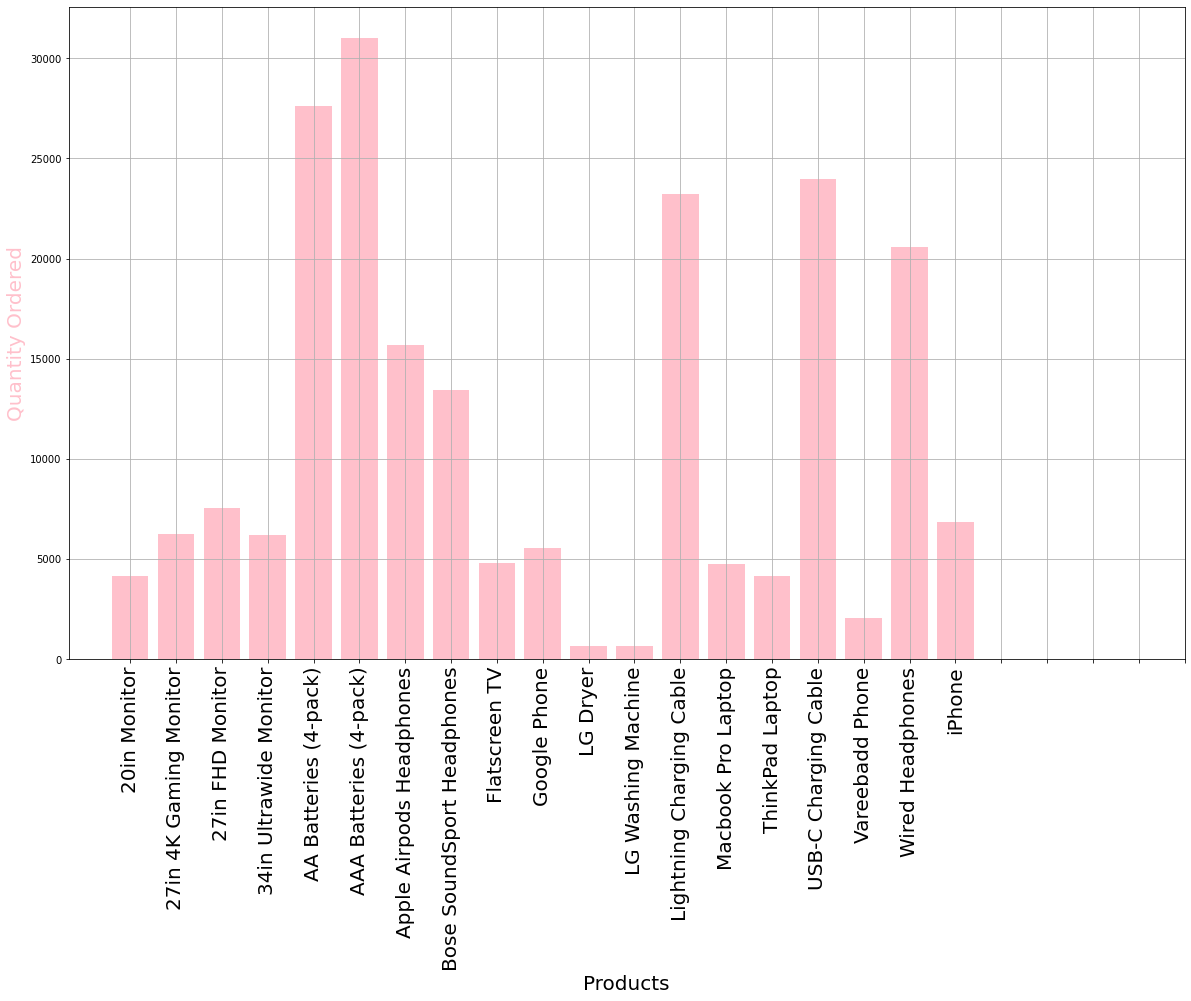

In [93]:
# Visualizing Quantity of sale of products using matplotlib

plt.figure(figsize=(20,12))
plt.bar(products, quantity_ordered, color='pink')
plt.xticks(hours, rotation='vertical', size=20)
plt.ylabel('Quantity Ordered',color = 'pink',size=20)
plt.xlabel('Products', size=20)
plt.grid()
plt.show()

In [91]:
prices = df.groupby('Product').mean()['Price Each']
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

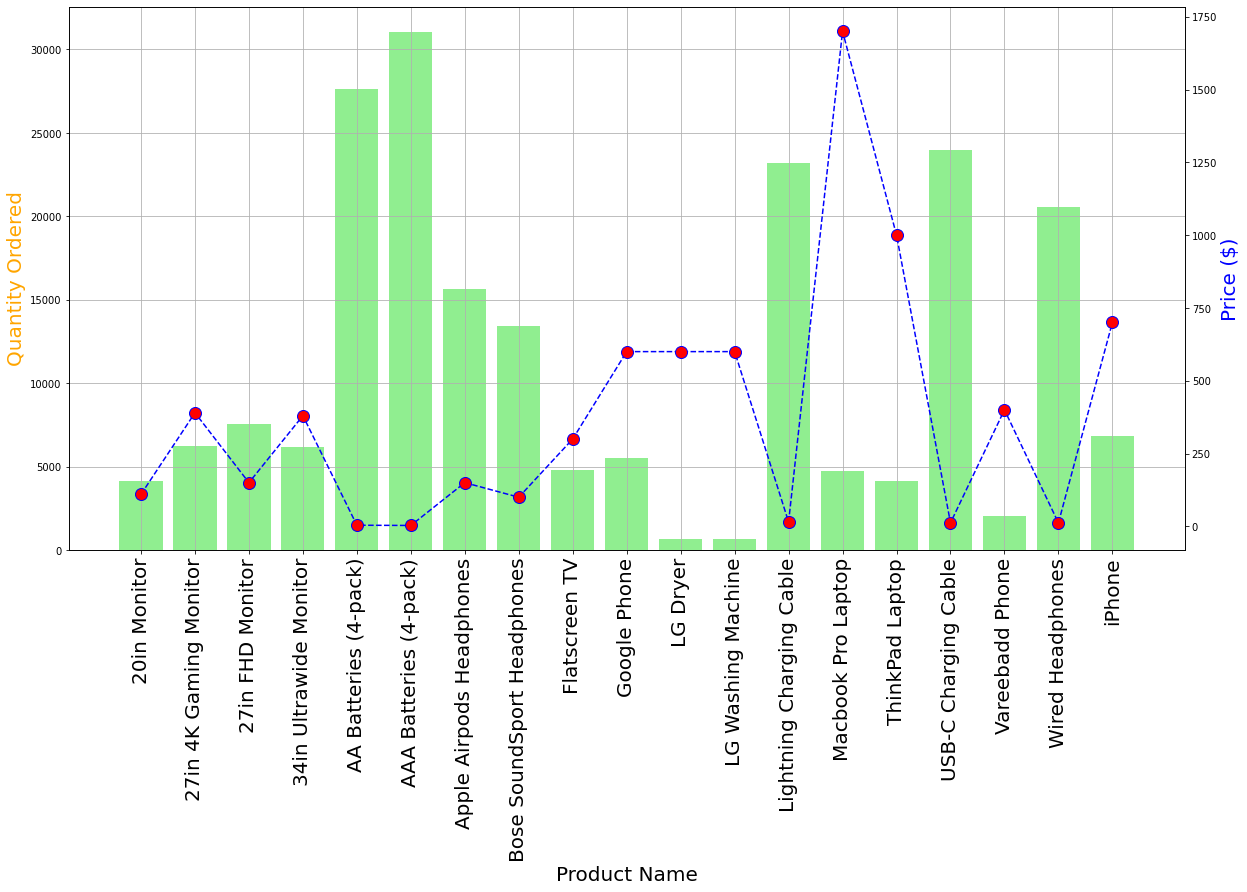

In [94]:
# Visualizing products Quantity Ordered over Prices

fig, ax1 = plt.subplots(figsize=(20,10) )

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color='lightgreen')
ax2.plot(products, prices, color='b', linestyle='dashed', marker='o',markerfacecolor='red', markersize=12)

ax1.set_xlabel('Product Name', size=20)
ax1.set_ylabel('Quantity Ordered', color='orange', size=20)
ax2.set_ylabel('Price ($)', color='b', size=20)
ax1.set_xticklabels(products, rotation='vertical', size=20)
ax1.grid()

**Question 5 : What product sold the most? Why do you think it sold the most?**
> Products, which have **low prices are more likely to be sold** (E.g. AAA Batteries, AA Batteries etc.) and products that have **high prices are less likely to be sold** (E.g. LG Washing Machine, LG Dryer etc.).